### DECISION TREE PRUNING

In [ ]:
import sklearn
sklearn.__version__

'1.6.1'

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier


In [ ]:
data = load_breast_cancer()
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [ ]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train.shape

(426, 30)

In [ ]:
unpruned_tree = DecisionTreeClassifier(random_state=0)
unpruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
pred=unpruned_tree.predict(X_test)
from sklearn.metrics import accuracy_score
print("Test Accuracy ->",accuracy_score(y_test, pred))

Test Accuracy -> 0.8811188811188811


In [ ]:
print("Train Accuracy ->",unpruned_tree.score(X_train, y_train))

Train Accuracy -> 1.0


Text(0.5, 1.0, 'Unpruned Decision Tree')

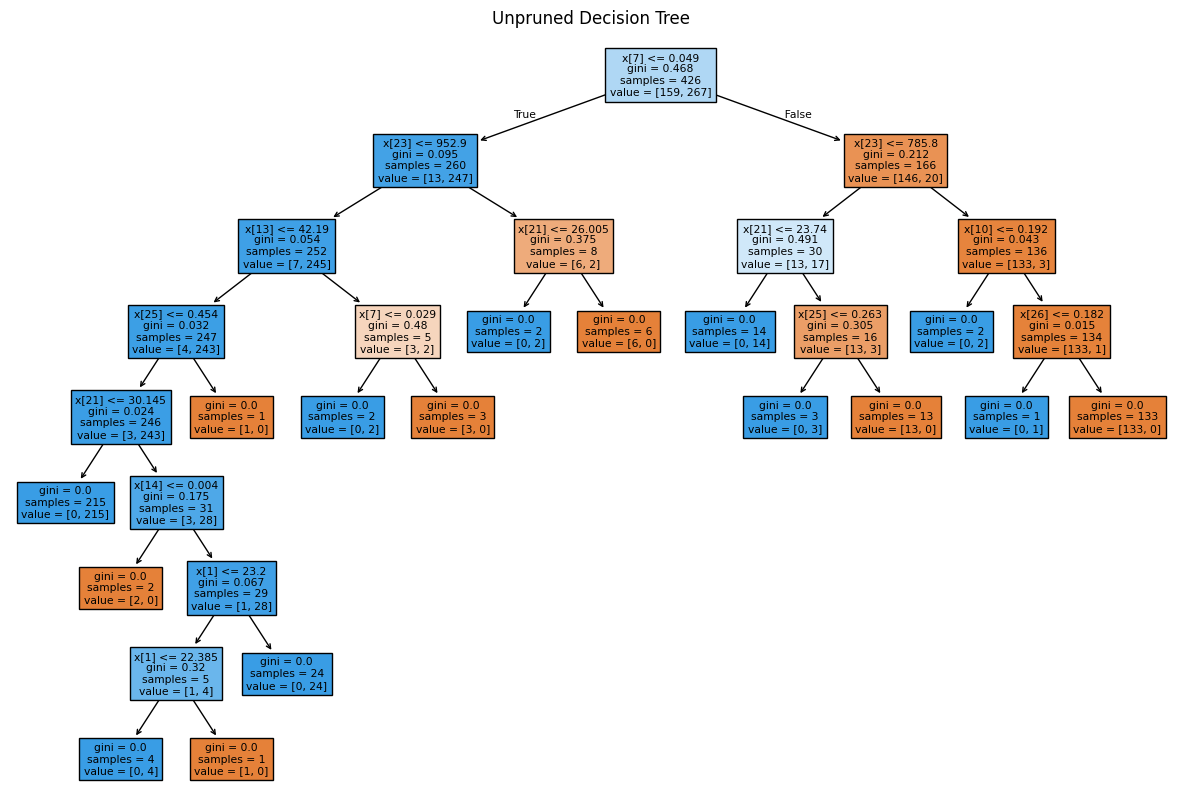

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(unpruned_tree,filled=True)
plt.title("Unpruned Decision Tree")

# Pre Pruning



The class:`DecisionTreeClassifier` takes parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfitting.

In [ ]:
print(unpruned_tree.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 0, 'splitter': 'best'}


In [ ]:

pre_pruned_tree = DecisionTreeClassifier(max_leaf_nodes=4,random_state=0)
pre_pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=4, random_state=0)

In [ ]:
print("Train Accuracy ->",pre_pruned_tree.score(X_train, y_train))

Train Accuracy -> 0.9553990610328639


In [ ]:
pred=pre_pruned_tree.predict(X_test)
print("Test accuracy ->",accuracy_score(y_test, pred))

Test accuracy -> 0.916083916083916


Text(0.5, 1.0, 'Pre-pruned Decision Tree')

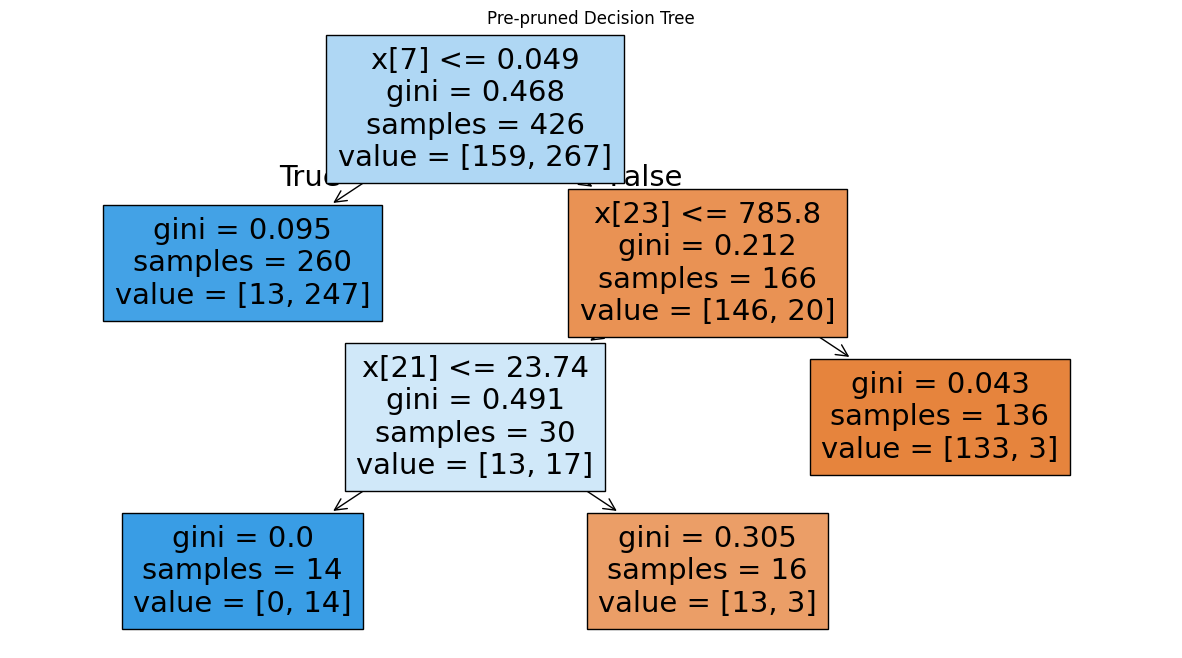

In [ ]:
plt.figure(figsize=(15,8))
tree.plot_tree(pre_pruned_tree,filled=True)
plt.title("Pre-pruned Decision Tree")


# Post pruning





Cost complexity pruning is used to control the size of a tree. In
:class:`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

In [ ]:
path = unpruned_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
path

{'ccp_alphas': array([0.        , 0.00226647, 0.00464743, 0.0046598 , 0.0056338 ,
        0.00704225, 0.00784194, 0.00911402, 0.01144366, 0.018988  ,
        0.02314163, 0.03422475, 0.32729844]),
 'impurities': array([0.        , 0.00453294, 0.01847522, 0.02313502, 0.02876883,
        0.03581108, 0.04365302, 0.05276704, 0.0642107 , 0.0831987 ,
        0.10634033, 0.14056508, 0.46786352])}

In [ ]:
ccp_alphas

array([0.        , 0.00226647, 0.00464743, 0.0046598 , 0.0056338 ,
       0.00704225, 0.00784194, 0.00911402, 0.01144366, 0.018988  ,
       0.02314163, 0.03422475, 0.32729844])

In [ ]:
impurities

array([0.        , 0.00453294, 0.01847522, 0.02313502, 0.02876883,
       0.03581108, 0.04365302, 0.05276704, 0.0642107 , 0.0831987 ,
       0.10634033, 0.14056508, 0.46786352])

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3272984419327777


/tmp/ipython-input-118298997.py:15: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(buf))


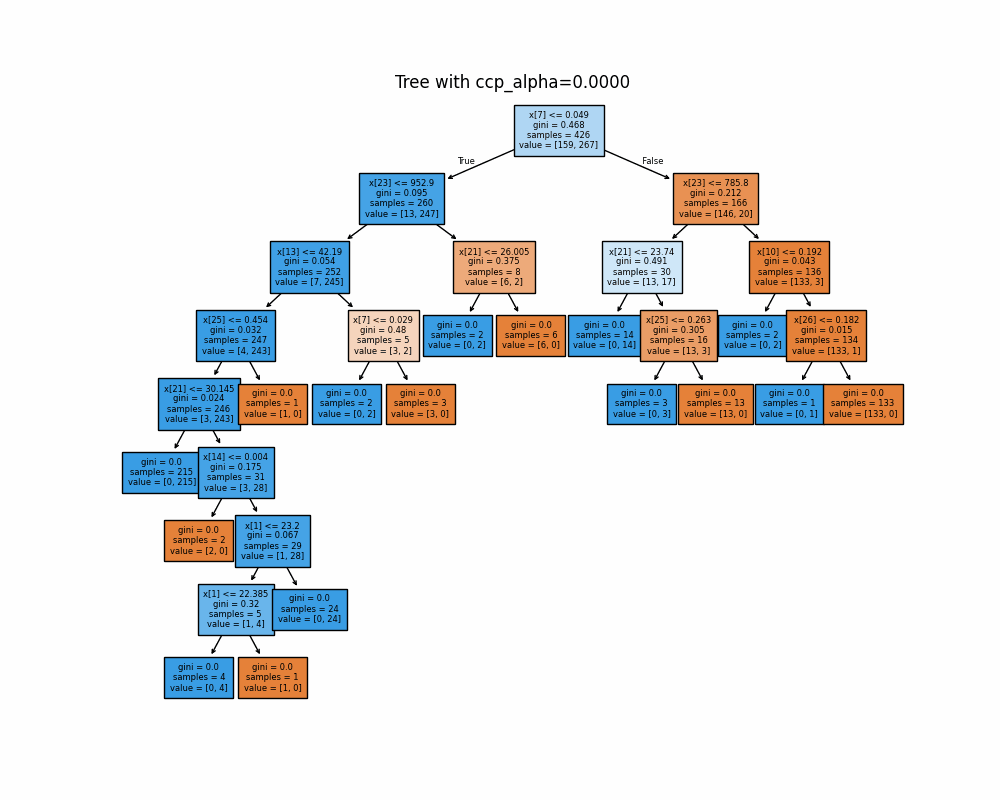

In [ ]:
import io
import imageio
import matplotlib.pyplot as plt
from sklearn import tree

images = []
for i, clf in enumerate(clfs):
    buf = io.BytesIO()
    plt.figure(figsize=(10, 8))
    tree.plot_tree(clf, filled=True, fontsize=6)
    plt.title(f"Tree with ccp_alpha={ccp_alphas[i]:.4f}")
    plt.savefig(buf, format='png')
    plt.close()

    images.append(imageio.imread(buf))

imageio.mimsave('pruned_trees_in_memory.gif', images, duration=1000) # Increased duration to 10 seconds
from IPython.display import Image
Image(filename='pruned_trees_in_memory.gif',embed=True)

# Total Impurity  Vs Alpha

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

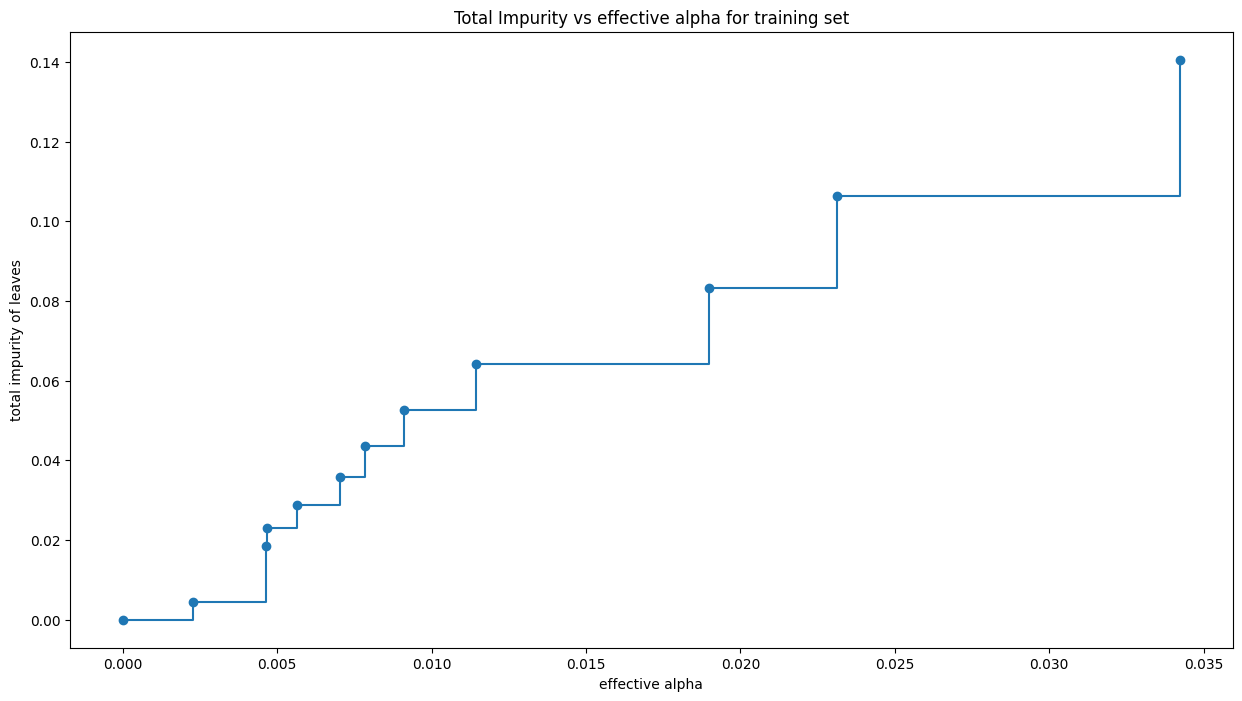

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

For this plot, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. .



# Number of nodes Vs Alpha

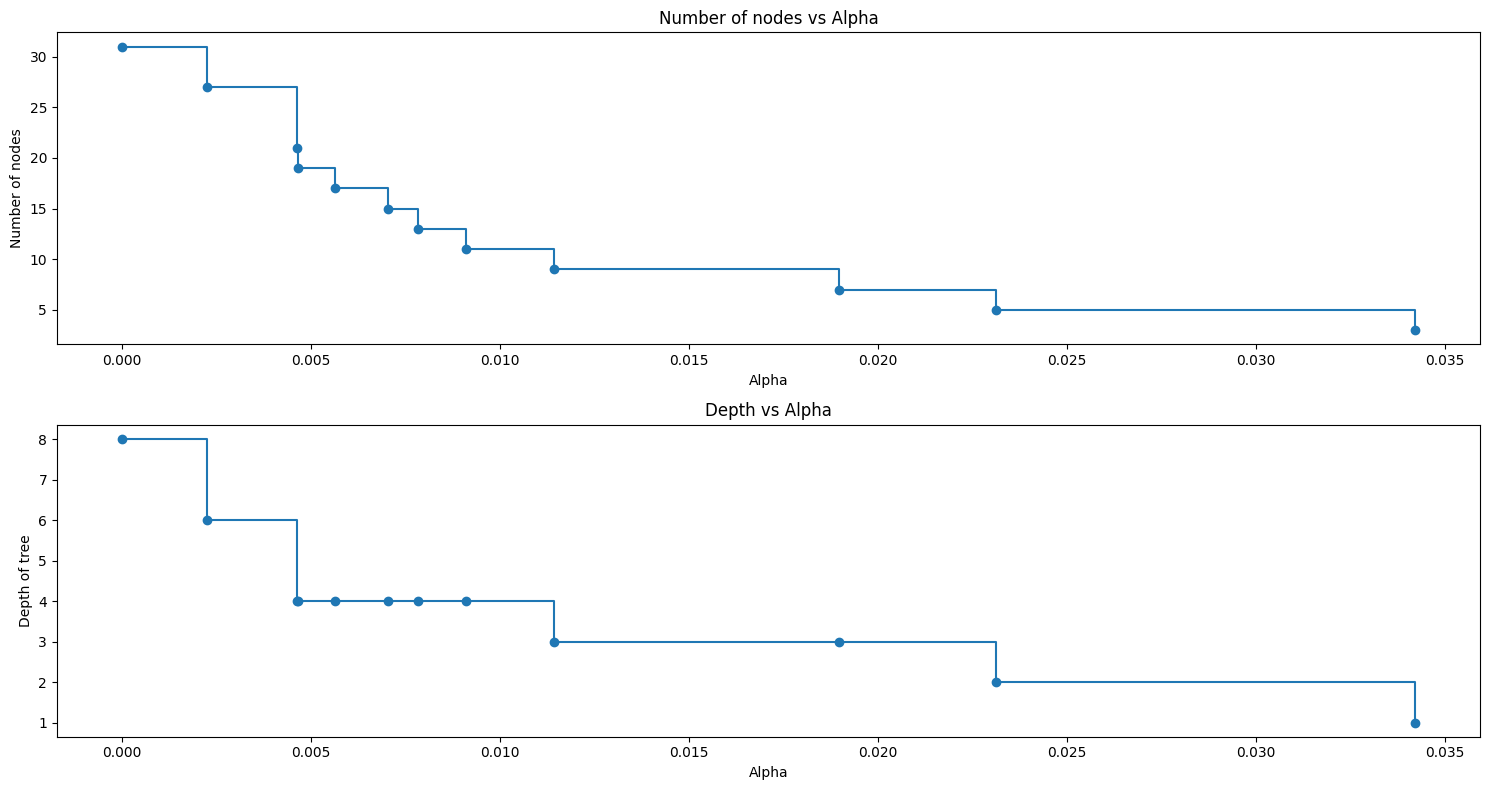

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(15, 8))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("Alpha")
ax[0].set_ylabel("Number of nodes")
ax[0].set_title("Number of nodes vs Alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Depth of tree")
ax[1].set_title("Depth vs Alpha")
fig.tight_layout()



# Accuracy Vs Alpha

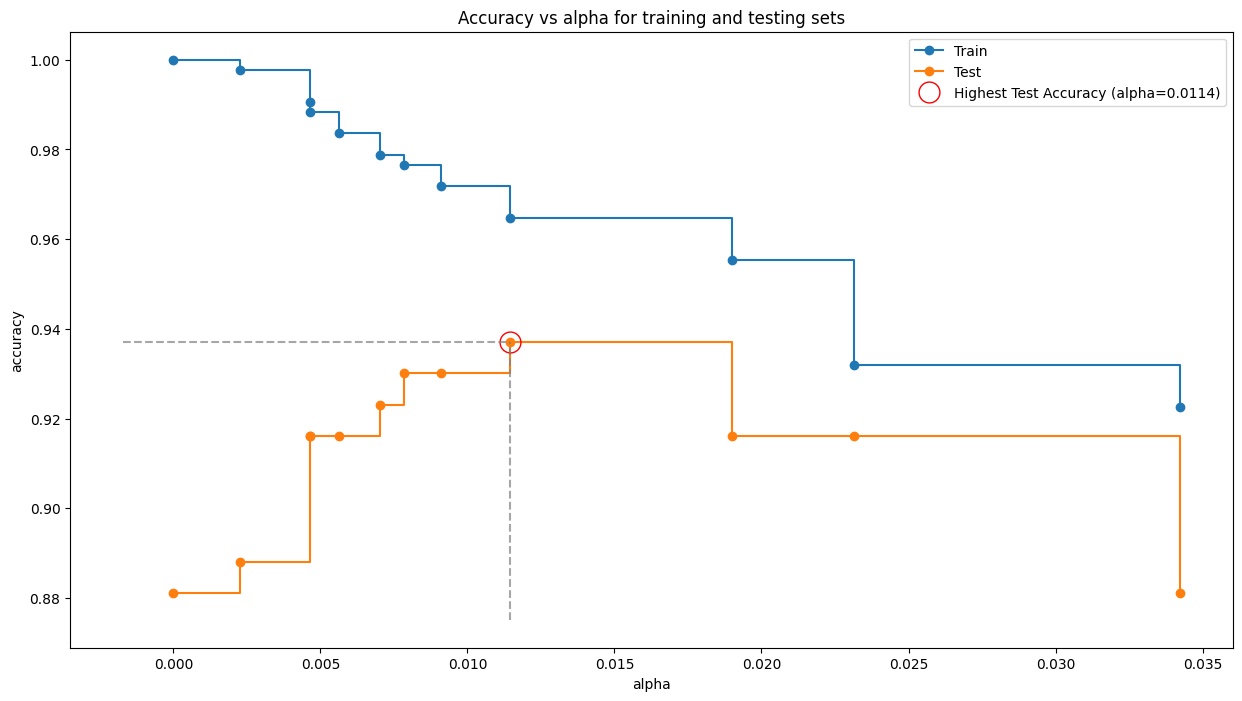

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(15, 8))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="Train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="Test",
        drawstyle="steps-post")

optimal_alpha_index = test_scores.index(max(test_scores))
optimal_alpha = ccp_alphas[optimal_alpha_index]
highest_test_score = test_scores[optimal_alpha_index]


ax.plot(optimal_alpha, highest_test_score, 'o', color='red', markersize=15, fillstyle='none', label=f'Highest Test Accuracy (alpha={optimal_alpha:.4f})')

ax.hlines(highest_test_score, ax.get_xlim()[0], optimal_alpha, color='gray', linestyle='--', alpha=0.7)
ax.vlines(optimal_alpha, ax.get_ylim()[0], highest_test_score, color='gray', linestyle='--', alpha=0.7)


ax.legend()
plt.show()

In [ ]:
post_pruned_tree = DecisionTreeClassifier(random_state=0, ccp_alpha=0.0114)
post_pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0114, random_state=0)

In [ ]:
pred=post_pruned_tree.predict(X_test)
from sklearn.metrics import accuracy_score
print("Train Accuracy ->",post_pruned_tree.score(X_train, y_train))
print("Test Accuracy ->",accuracy_score(y_test, pred))

Train Accuracy -> 0.971830985915493
Test Accuracy -> 0.9300699300699301


Text(0.5, 1.0, 'Post-Pruned Decision Tree')

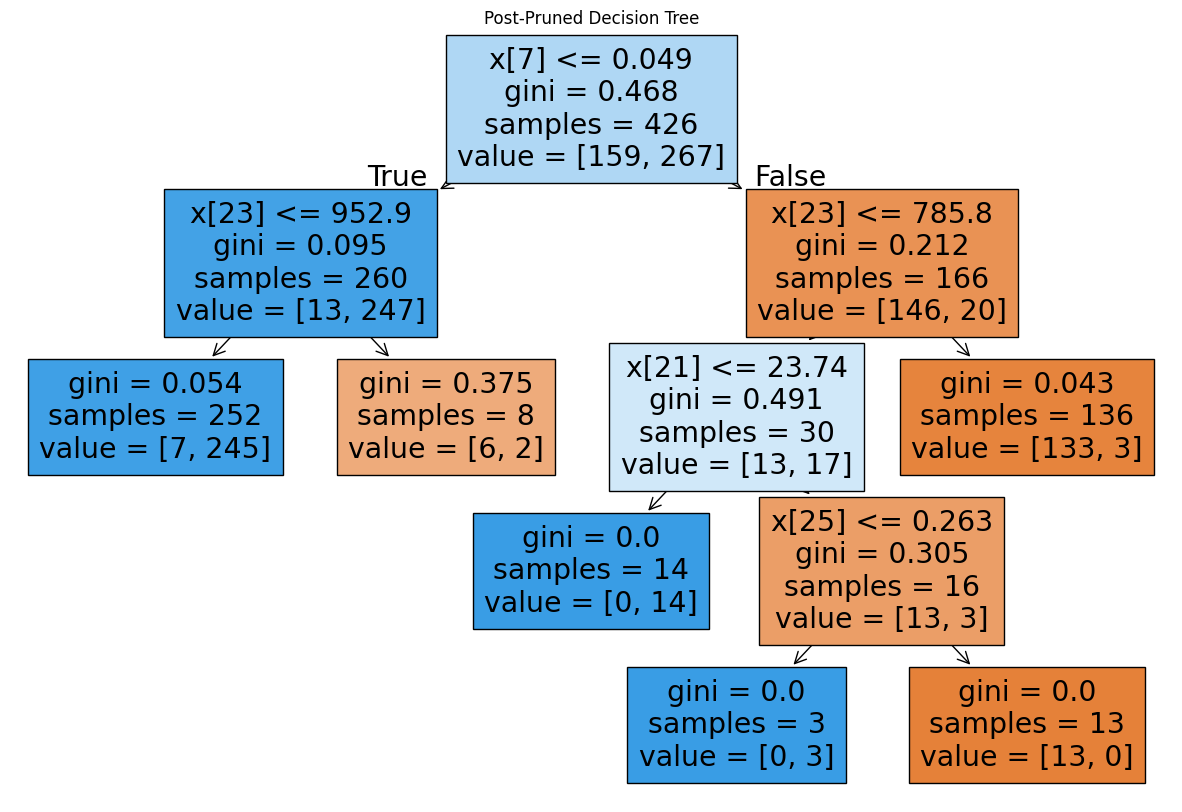

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))

tree.plot_tree(post_pruned_tree,filled=True)
plt.title("Post-Pruned Decision Tree")